In [30]:
import numpy as np
import pandas as pd 
from keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import keras,os
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation,GlobalMaxPooling2D
import numpy as np
from tensorflow.keras.applications import VGG19, VGG16, Xception, MobileNetV2, EfficientNetB0, ResNet50V2 
from keras.models import Model
from tensorflow.keras import optimizers , layers, applications
print(os.listdir("../input"))

['test140', 'ytuia-2d', '2d-validation', 'federated-model', 'fedaratedd1-d2']


In [31]:
#Hyperparameters

epochs = 50
batch_size = 32
LEARNING_R = .001


image_size = 224
input_shape = (image_size, image_size, 3)

(3651, 2)

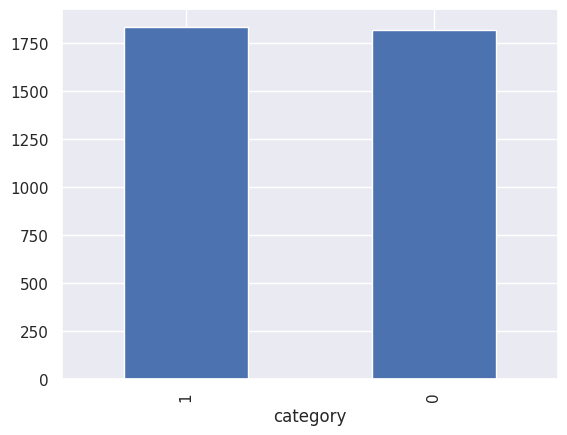

In [32]:
#Lebel the train dataset

train_filenames = os.listdir("/kaggle/input/fedaratedd1-d2/Fedarated/Train")
categories = []
New_file= []
for filename in train_filenames:
    category = filename.split('.')[0]
    if category == 'Autistic':
        categories.append(str(1))
        New_file.append(filename)
    if category == 'Non_Autistic':
        categories.append(str(0))
        New_file.append(filename)

train_df1 = pd.DataFrame({
    'filename': New_file,
    'category': categories
})

categories = []
New_file= []
for filename in train_filenames:
    category = filename.split('_')[0]
    #print(filename.split('_')[0])
    if category == 'DestAutistic':
        categories.append(str(1))
        New_file.append(filename)
    if category == 'DestNon':
        categories.append(str(0))
        New_file.append(filename)

train_df2 = pd.DataFrame({
    'filename': New_file,
    'category': categories
})

train_df = pd.concat([train_df1, train_df2], ignore_index = True)
train_df.reset_index()

train_df




train_df['category'].value_counts().plot.bar()
train_df.shape

In [33]:
#Lebel the test dataset

test_filenames = os.listdir("/kaggle/input/fedaratedd1-d2/Fedarated/Test")
categories = []
New_file= []
for filename in test_filenames:
    category = filename.split(' (')[0]
    if category == 'Autistic':
        categories.append(str(1))
        New_file.append(filename)
    if category == 'Non-Autistic':
        categories.append(str(0))
        New_file.append(filename)

test_df1 = pd.DataFrame({
    'filename': New_file,
    'category': categories
})

categories = []
New_file= []
for filename in test_filenames:
    category = filename.split('_')[0]
    #print(filename.split('_')[0])
    if category == 'DestAutistic':
        categories.append(str(1))
        New_file.append(filename)
    if category == 'DestNon':
        categories.append(str(0))
        New_file.append(filename)

test_df2 = pd.DataFrame({
    'filename': New_file,
    'category': categories
})

test_df = pd.concat([test_df1, test_df2], ignore_index = True)
test_df.reset_index()

test_df

,filename,category
0,Autistic (39).jpg,1
1,Autistic (82).jpg,1
2,Non-Autistic (19).jpg,0
3,Autistic (96).jpg,1
4,Non-Autistic (93).jpg,0
...,...,...
375,DestAutistic_087.jpg,1
376,DestAutistic_029.jpg,1
377,DestAutistic_357.jpg,1
378,DestNon_Autistis_490.jpg,0


In [34]:
# #Lebel the test dataset

# test_filenames = os.listdir("/kaggle/input/test140/test")
# categories = []
# for filename in test_filenames:
#     category = filename.split(' (')[0]
#     if category == 'Autistic':
#         categories.append(str(1))
#     else:
#         categories.append(str(0))

# test_df = pd.DataFrame({
#     'filename': test_filenames,
#     'category': categories
# })
# test_df

(160, 2)

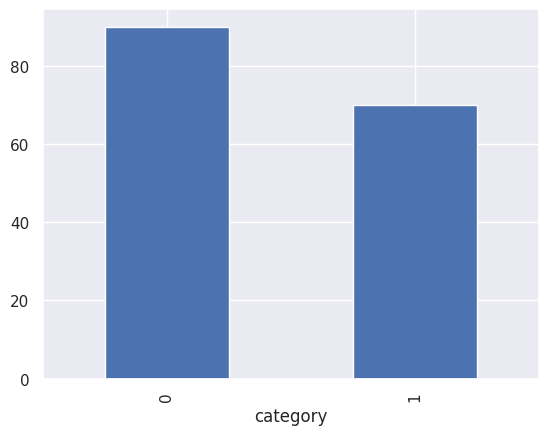

In [35]:
#Lebel the test dataset

validation_filenames = os.listdir("/kaggle/input/fedaratedd1-d2/Fedarated/Valid")
categories = []
New_file= []
for filename in validation_filenames:
    category = filename.split('.')[0]
    if category == 'Autistic':
        categories.append(str(1))
        New_file.append(filename)
    if category == 'Non_Autistic':
        categories.append(str(0))
        New_file.append(filename)

validation_df1 = pd.DataFrame({
    'filename': New_file,
    'category': categories
})

categories = []
New_file= []
for filename in validation_filenames:
    category = filename.split('_')[0]
    #print(filename.split('_')[0])
    if category == 'DestAutistic':
        categories.append(str(1))
        New_file.append(filename)
    if category == 'DestNon':
        categories.append(str(0))
        New_file.append(filename)

validation_df2 = pd.DataFrame({
    'filename': New_file,
    'category': categories
})

validation_df = pd.concat([validation_df1, validation_df2], ignore_index = True)
validation_df.reset_index()

validation_df

validation_df['category'].value_counts().plot.bar()
validation_df.shape

In [36]:
total_train = train_df.shape[0]
total_test = test_df.shape[0]

In [37]:
# Training Generator
train_datagen = ImageDataGenerator(
           rotation_range=15,
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    width_shift_range=0.1,
    height_shift_range=0.1
   )

train_generator = train_datagen.flow_from_dataframe(
    train_df, 
     "/kaggle/input/fedaratedd1-d2/Fedarated/Train",
    x_col='filename',
    y_col='category',
    class_mode='categorical',
    target_size=(image_size, image_size),
    batch_size=batch_size
)

Found 3651 validated image filenames belonging to 2 classes.


In [38]:
# test Generator
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_dataframe(test_df, "/kaggle/input/fedaratedd1-d2/Fedarated/Test", 
    x_col='filename',
    y_col='category',
    class_mode='categorical',target_size=(image_size, image_size),batch_size=batch_size,shuffle=False)

Found 380 validated image filenames belonging to 2 classes.


In [39]:
# Validation Generator
validate_datagen = ImageDataGenerator(rescale=1./255)
validate_generator = validate_datagen.flow_from_dataframe(validation_df,"/kaggle/input/fedaratedd1-d2/Fedarated/Valid",
    x_col='filename',
    y_col='category',
    class_mode='categorical',target_size=(image_size, image_size),batch_size=batch_size)

total_validate = validation_df.shape[0]

Found 160 validated image filenames belonging to 2 classes.


In [40]:
# Transfer Learning model 


pre_trained_model = ResNet50V2(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=input_shape,
    pooling=None,

)

last_layer = pre_trained_model.get_layer('conv5_block3_out')
last_output = last_layer.output

# Flatten the output layer to 1 dimension
x = GlobalMaxPooling2D()(last_output)
# Add a fully connected layer with 512 hidden units and ReLU activation
x = Dense(512, activation='relu')(x)
# Add a dropout rate of 0.5
x = Dropout(0.5)(x)
# Add a final sigmoid layer for classification
x = layers.Dense(2, activation='softmax')(x)

model = Model(pre_trained_model.input, x)

model.compile(loss='CategoricalCrossentropy',
              optimizer=optimizers.Adagrad(learning_rate=LEARNING_R,initial_accumulator_value=0.01),
              metrics=['accuracy',tf.keras.metrics.AUC(),tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])

model.summary()


#Fit Model
history = model.fit_generator(train_generator,epochs=epochs,validation_data=validate_generator,validation_steps=total_validate//batch_size,steps_per_epoch=total_train//batch_size)

model.save('Res_Final.h5')

94668760/94668760 [==============================] - 4s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 pool1_pad (ZeroPadding2D)   (None, 114, 114, 64)         0         ['conv1_conv[0][0]']          
                             

/tmp/ipykernel_42/4135777678.py:35: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,epochs=epochs,validation_data=validate_generator,validation_steps=total_validate//batch_size,steps_per_epoch=total_train//batch_size)


114/114 [==============================] - 74s 443ms/step - loss: 0.7226 - accuracy: 0.6366 - auc: 0.6766 - precision: 0.6366 - recall: 0.6366 - val_loss: 0.4942 - val_accuracy: 0.7563 - val_auc: 0.8442 - val_precision: 0.7563 - val_recall: 0.7563


/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


['loss', 'accuracy', 'auc', 'precision', 'recall']
['loss', 'accuracy', 'auc', 'precision', 'recall', 'val_loss', 'val_accuracy', 'val_auc', 'val_precision', 'val_recall']


/tmp/ipykernel_42/2455470877.py:7: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  loss,accuracy,auc,precision,recall = model.evaluate_generator(train_generator, total_train//batch_size, workers=1)


ResNet50V2:Train: Accuracy = 0.682840  ;  AUC = 0.761320 ;  Precision = 0.682840  ;  Recall = 0.682840 ;  Loss = 0.579448  


/tmp/ipykernel_42/2455470877.py:10: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  loss,accuracy,auc_Res,precision,recall = model.evaluate_generator(test_generator, total_test//batch_size, workers=1)


ResNet50V2:Test: Accuracy = 0.758523  ;  AUC = 0.839791 ;  Precision = 0.758523  ;  Recall = 0.758523 ;  Loss = 0.494356  


/tmp/ipykernel_42/2455470877.py:13: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  loss,accuracy,auc,precision,recall = model.evaluate_generator(validate_generator, total_validate//batch_size, workers=1)


ResNet50V2:Validate: Accuracy = 0.756250  ;  AUC = 0.844180 ;  Precision = 0.756250  ;  Recall = 0.756250 ;  Loss = 0.494240  


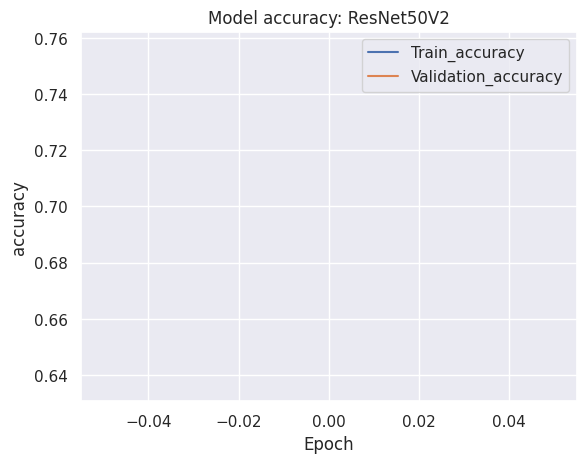

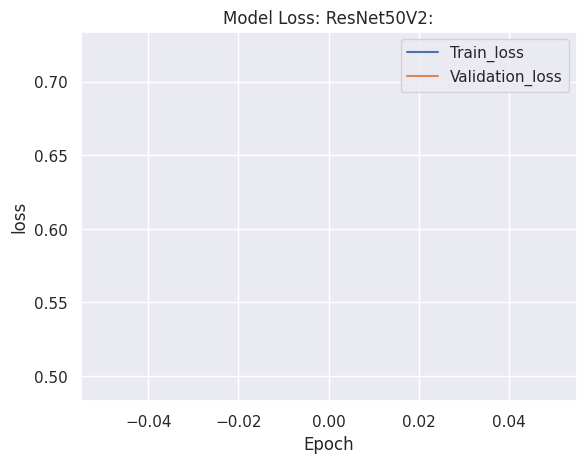

In [41]:
print(model.metrics_names)
name=history.history.keys()
name=list(name)
print(name)
name[0]

loss,accuracy,auc,precision,recall = model.evaluate_generator(train_generator, total_train//batch_size, workers=1)
print("ResNet50V2:Train: Accuracy = %f  ;  AUC = %f ;  Precision = %f  ;  Recall = %f ;  Loss = %f  " % (accuracy, auc, precision, recall, loss))

loss,accuracy,auc_Res,precision,recall = model.evaluate_generator(test_generator, total_test//batch_size, workers=1)
print("ResNet50V2:Test: Accuracy = %f  ;  AUC = %f ;  Precision = %f  ;  Recall = %f ;  Loss = %f  " % (accuracy, auc_Res, precision, recall, loss))

loss,accuracy,auc,precision,recall = model.evaluate_generator(validate_generator, total_validate//batch_size, workers=1)
print("ResNet50V2:Validate: Accuracy = %f  ;  AUC = %f ;  Precision = %f  ;  Recall = %f ;  Loss = %f  " % (accuracy, auc, precision, recall, loss))

import matplotlib.pyplot as plt
# summarize history for accuracy
#plt.grid()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy: ResNet50V2')
plt.ylabel(model.metrics_names[1])
plt.xlabel('Epoch')
plt.legend(['Train_accuracy', 'Validation_accuracy'], loc='upper right')
plt.savefig('train_accuracy.pdf', format='pdf', dpi=300)
plt.savefig('train_accuracy.png', format='png', dpi=300)
plt.show()

#plt.grid()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss: ResNet50V2:')
plt.ylabel(model.metrics_names[0])
plt.xlabel('Epoch')
plt.legend(['Train_loss', 'Validation_loss'], loc='upper right')
plt.savefig('train_loss.pdf', format='pdf', dpi=300)
plt.savefig('train_loss.png', format='png', dpi=300)
plt.show()

380


/tmp/ipykernel_42/1410368082.py:20: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_generator, steps = np.ceil(test_generator.samples / test_generator.batch_size), verbose=1, workers=1)


12/12 [==============================] - 2s 80ms/step
Classification Report
              precision    recall  f1-score   support

           0       0.67      0.97      0.79       190
           1       0.94      0.52      0.67       190

    accuracy                           0.74       380
   macro avg       0.80      0.74      0.73       380
weighted avg       0.80      0.74      0.73       380

[[184   6]
 [ 92  98]]
class-1 acc:  0.968421052631579
class-2 acc:  0.5157894736842106


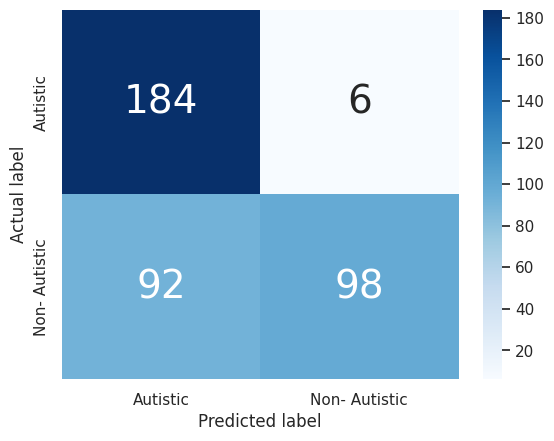

In [42]:
from __future__ import print_function
import sklearn
from matplotlib import pyplot as plt 
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import numpy as np
import h5py
import os
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn
import sklearn.metrics as metrics
from keras.models import load_model

#Change HERE  
##model = load_model('../Kaggle/working/vgg19.h5')
print(test_generator.samples)
predictions = model.predict_generator(test_generator, steps = np.ceil(test_generator.samples / test_generator.batch_size), verbose=1, workers=1) 
Y_pred = np.argmax(predictions, axis=1) 
print('Classification Report') 
print(classification_report(test_generator.classes, Y_pred))
%matplotlib inline
original = test_generator.labels

cm=confusion_matrix(original,Y_pred)
print(cm)
y_true = ["Non- Autistic","Autistic"]
#y_true=['Non- Autistic', 'Autistic']
data = cm
class1_acc = data[0][0]/(data[0][0]+data[0][1])
class2_acc = data[1][1]/(data[1][0]+data[1][1])
print('class-1 acc: ',class1_acc)
print('class-2 acc: ',class2_acc)

df_cm = pd.DataFrame(data, columns=np.unique(y_true), index = np.unique(y_true))
df_cm.index.name = 'Actual label'
df_cm.columns.name = 'Predicted label'
sn.set(font_scale=1)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 28}, fmt="d")
plt.savefig('Cm.pdf', format='pdf', dpi=300)
plt.savefig('Cm.png', format='png', dpi=300)
fpr_Res, tpr_Res, threshold = metrics.roc_curve(original, Y_pred)
#roc_auc = metrics.auc(fpr, tpr)

In [43]:
# Transfer Learning model 

pre_trained_model = MobileNetV2(
    input_shape=input_shape,
    alpha=1.0,
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    pooling=None,
    classifier_activation="softmax"
)

last_layer = pre_trained_model.get_layer('Conv_1')
last_output = last_layer.output

# Flatten the output layer to 1 dimension
x = GlobalMaxPooling2D()(last_output)
# Add a fully connected layer with 512 hidden units and ReLU activation
x = Dense(512, activation='relu')(x)
# Add a dropout rate of 0.5
x = Dropout(0.5)(x)
# Add a final sigmoid layer for classification
x = layers.Dense(2, activation='softmax')(x)

model = Model(pre_trained_model.input, x)

model.compile(loss='CategoricalCrossentropy',
              optimizer=optimizers.Adagrad(learning_rate=LEARNING_R,initial_accumulator_value=0.01),
              metrics=['accuracy',tf.keras.metrics.AUC(),tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])

model.summary()

#Fit Model
history = model.fit_generator(train_generator,epochs=epochs,validation_data=validate_generator,validation_steps=total_validate//batch_size,steps_per_epoch=total_train//batch_size)
model.save('Mob_Final.h5')

9406464/9406464 [==============================] - 1s 0us/step
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_2[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           

/tmp/ipykernel_42/4048543114.py:34: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,epochs=epochs,validation_data=validate_generator,validation_steps=total_validate//batch_size,steps_per_epoch=total_train//batch_size)


114/114 [==============================] - 63s 380ms/step - loss: 1.0641 - accuracy: 0.6082 - auc_1: 0.6415 - precision_1: 0.6082 - recall_1: 0.6082 - val_loss: 0.7525 - val_accuracy: 0.5813 - val_auc_1: 0.6606 - val_precision_1: 0.5813 - val_recall_1: 0.5813


/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


['loss', 'accuracy', 'auc_1', 'precision_1', 'recall_1']
['loss', 'accuracy', 'auc_1', 'precision_1', 'recall_1', 'val_loss', 'val_accuracy', 'val_auc_1', 'val_precision_1', 'val_recall_1']


/tmp/ipykernel_42/289898891.py:7: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  loss,accuracy,auc,precision,recall = model.evaluate_generator(train_generator, total_train//batch_size, workers=1)


MobileNetV2:Train: Accuracy = 0.548520  ;  AUC = 0.616277 ;  Precision = 0.548520  ;  Recall = 0.548520 ;  Loss = 0.882816  


/tmp/ipykernel_42/289898891.py:10: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  loss,accuracy,auc_Mob,precision,recall = model.evaluate_generator(test_generator, total_test//batch_size, workers=1)


MobileNetV2:Test: Accuracy = 0.531250  ;  AUC = 0.661105 ;  Precision = 0.531250  ;  Recall = 0.531250 ;  Loss = 0.852099  


/tmp/ipykernel_42/289898891.py:13: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  loss,accuracy,auc,precision,recall = model.evaluate_generator(validate_generator, total_validate//batch_size, workers=1)


MobileNetV2:Validate: Accuracy = 0.581250  ;  AUC = 0.660645 ;  Precision = 0.581250  ;  Recall = 0.581250 ;  Loss = 0.752460  


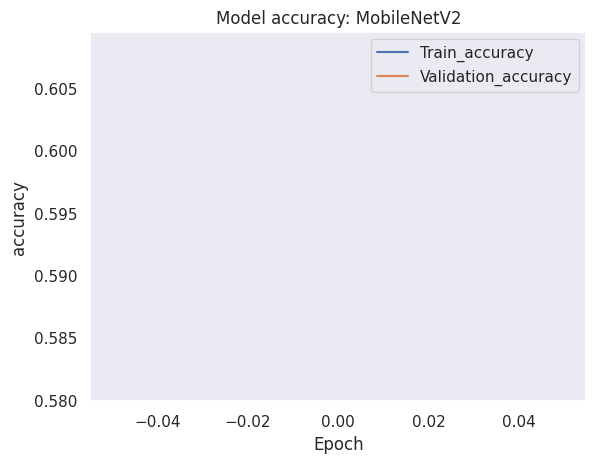

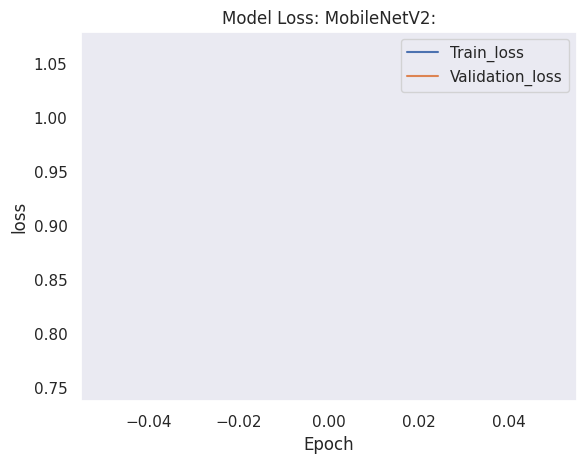

In [44]:
print(model.metrics_names)
name=history.history.keys()
name=list(name)
print(name)
name[0]

loss,accuracy,auc,precision,recall = model.evaluate_generator(train_generator, total_train//batch_size, workers=1)
print("MobileNetV2:Train: Accuracy = %f  ;  AUC = %f ;  Precision = %f  ;  Recall = %f ;  Loss = %f  " % (accuracy, auc, precision, recall, loss))

loss,accuracy,auc_Mob,precision,recall = model.evaluate_generator(test_generator, total_test//batch_size, workers=1)
print("MobileNetV2:Test: Accuracy = %f  ;  AUC = %f ;  Precision = %f  ;  Recall = %f ;  Loss = %f  " % (accuracy, auc_Mob, precision, recall, loss))

loss,accuracy,auc,precision,recall = model.evaluate_generator(validate_generator, total_validate//batch_size, workers=1)
print("MobileNetV2:Validate: Accuracy = %f  ;  AUC = %f ;  Precision = %f  ;  Recall = %f ;  Loss = %f  " % (accuracy, auc, precision, recall, loss))

import matplotlib.pyplot as plt
# summarize history for accuracy
plt.grid()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy: MobileNetV2')
plt.ylabel(model.metrics_names[1])
plt.xlabel('Epoch')
plt.legend(['Train_accuracy', 'Validation_accuracy'], loc='upper right')
plt.savefig('train_accuracy.pdf', format='pdf', dpi=300)
plt.savefig('train_accuracy.png', format='png', dpi=300)
plt.show()

plt.grid()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss: MobileNetV2:')
plt.ylabel(model.metrics_names[0])
plt.xlabel('Epoch')
plt.legend(['Train_loss', 'Validation_loss'], loc='upper right')
plt.savefig('train_loss.pdf', format='pdf', dpi=300)
plt.savefig('train_loss.png', format='png', dpi=300)
plt.show()

380


/tmp/ipykernel_42/1175773570.py:20: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_generator, steps = np.ceil(test_generator.samples / test_generator.batch_size), verbose=1, workers=1)


12/12 [==============================] - 2s 107ms/step
Classification Report
              precision    recall  f1-score   support

           0       0.52      0.98      0.68       190
           1       0.84      0.08      0.15       190

    accuracy                           0.53       380
   macro avg       0.68      0.53      0.42       380
weighted avg       0.68      0.53      0.42       380

[[187   3]
 [174  16]]
class-1 acc:  0.9842105263157894
class-2 acc:  0.08421052631578947


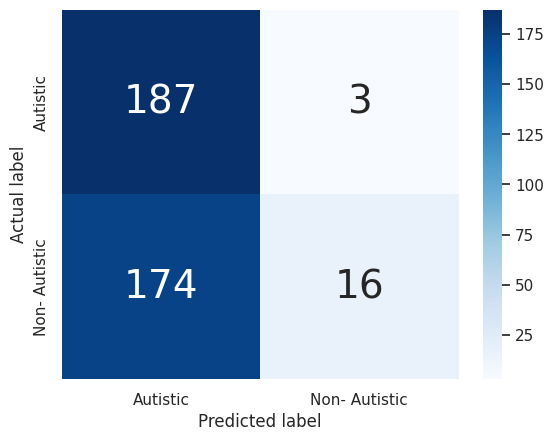

In [45]:
from __future__ import print_function
import sklearn
from matplotlib import pyplot as plt 
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import numpy as np
import h5py
import os
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn
import sklearn.metrics as metrics
from keras.models import load_model

#Change HERE  
##model = load_model('../Kaggle/working/vgg19.h5')
print(test_generator.samples)
predictions = model.predict_generator(test_generator, steps = np.ceil(test_generator.samples / test_generator.batch_size), verbose=1, workers=1) 
Y_pred = np.argmax(predictions, axis=1) 
print('Classification Report') 
print(classification_report(test_generator.classes, Y_pred))
%matplotlib inline
original = test_generator.labels

cm=confusion_matrix(original,Y_pred)
print(cm)
y_true = ["Non- Autistic","Autistic"]
#y_true=['Non- Autistic', 'Autistic']
data = cm
class1_acc = data[0][0]/(data[0][0]+data[0][1])
class2_acc = data[1][1]/(data[1][0]+data[1][1])
print('class-1 acc: ',class1_acc)
print('class-2 acc: ',class2_acc)

df_cm = pd.DataFrame(data, columns=np.unique(y_true), index = np.unique(y_true))
df_cm.index.name = 'Actual label'
df_cm.columns.name = 'Predicted label'
sn.set(font_scale=1)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 28}, fmt="d")
plt.savefig('Cm.pdf', format='pdf', dpi=300)
plt.savefig('Cm.png', format='png', dpi=300)
fpr_Mob, tpr_Mob, threshold = metrics.roc_curve(original, Y_pred)
#roc_auc = metrics.auc(fpr, tpr)

In [46]:
pre_trained_model = Xception(input_shape=input_shape, include_top=False, weights="imagenet",)

last_layer = pre_trained_model.get_layer('block14_sepconv2_act') 
last_output = pre_trained_model.layers[-1].output

# Flatten the output layer to 1 dimension
x = GlobalMaxPooling2D()(last_output)
# Add a fully connected layer with 512 hidden units and ReLU activation
x = Dense(512, activation='relu')(x)
# Add a dropout rate of 0.5
x = Dropout(0.5)(x)
# Add a final sigmoid layer for classification
x = layers.Dense(2, activation='softmax')(x)

model = Model(pre_trained_model.input, x)

model.compile(loss='CategoricalCrossentropy',
              optimizer=optimizers.Adagrad(learning_rate=LEARNING_R,initial_accumulator_value=0.01),
              metrics=['accuracy',tf.keras.metrics.AUC(),tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])

model.summary()

#Fit Model
history = model.fit_generator(train_generator,epochs=epochs,validation_data=validate_generator,validation_steps=total_validate//batch_size,steps_per_epoch=total_train//batch_size)
model.save('Xce_Final.h5')

83683744/83683744 [==============================] - 3s 0us/step
Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, 111, 111, 32)         864       ['input_3[0][0]']             
                                                                                                  
 block1_conv1_bn (BatchNorm  (None, 111, 111, 32)         128       ['block1_conv1[0][0]']        
 alization)                                                                                       
                                                                                                  
 block1_conv1_act (Activati

/tmp/ipykernel_42/3341667588.py:24: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,epochs=epochs,validation_data=validate_generator,validation_steps=total_validate//batch_size,steps_per_epoch=total_train//batch_size)


114/114 [==============================] - 66s 392ms/step - loss: 0.7647 - accuracy: 0.5781 - auc_2: 0.5925 - precision_2: 0.5781 - recall_2: 0.5781 - val_loss: 0.5979 - val_accuracy: 0.6938 - val_auc_2: 0.7585 - val_precision_2: 0.6938 - val_recall_2: 0.6938


/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


['loss', 'accuracy', 'auc_2', 'precision_2', 'recall_2']
['loss', 'accuracy', 'auc_2', 'precision_2', 'recall_2', 'val_loss', 'val_accuracy', 'val_auc_2', 'val_precision_2', 'val_recall_2']


/tmp/ipykernel_42/450701049.py:7: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  loss,accuracy,auc,precision,recall = model.evaluate_generator(train_generator, total_train//batch_size, workers=1)


Xception: Train: Accuracy = 0.638432  ;  AUC = 0.689003 ;  Precision = 0.638432  ;  Recall = 0.638432 ;  Loss = 0.636713  


/tmp/ipykernel_42/450701049.py:10: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  loss,accuracy,auc_Xce,precision,recall = model.evaluate_generator(test_generator, total_test//batch_size, workers=1)


Xception: Test: Accuracy = 0.693182  ;  AUC = 0.735457 ;  Precision = 0.693182  ;  Recall = 0.693182 ;  Loss = 0.607372  


/tmp/ipykernel_42/450701049.py:13: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  loss,accuracy,auc,precision,recall = model.evaluate_generator(validate_generator, total_validate//batch_size, workers=1)


Xception: Validate: Accuracy = 0.693750  ;  AUC = 0.758496 ;  Precision = 0.693750  ;  Recall = 0.693750 ;  Loss = 0.597907  


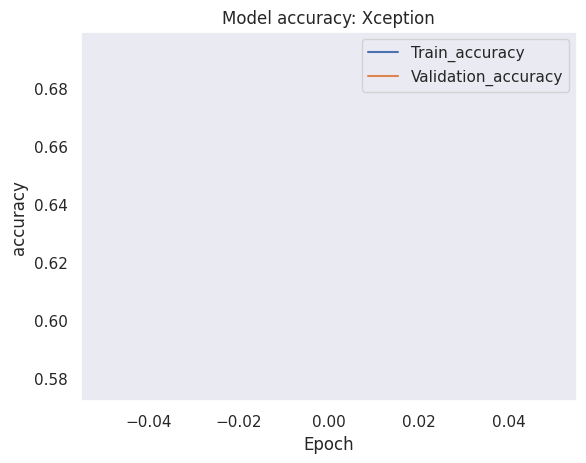

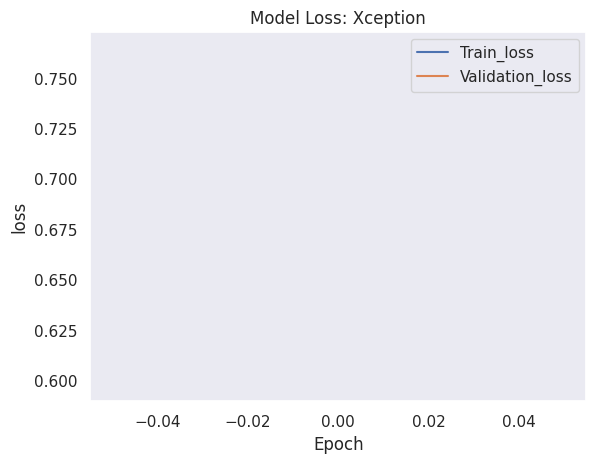

In [47]:
print(model.metrics_names)
name=history.history.keys()
name=list(name)
print(name)
name[0]

loss,accuracy,auc,precision,recall = model.evaluate_generator(train_generator, total_train//batch_size, workers=1)
print("Xception: Train: Accuracy = %f  ;  AUC = %f ;  Precision = %f  ;  Recall = %f ;  Loss = %f  " % (accuracy, auc, precision, recall, loss))

loss,accuracy,auc_Xce,precision,recall = model.evaluate_generator(test_generator, total_test//batch_size, workers=1)
print("Xception: Test: Accuracy = %f  ;  AUC = %f ;  Precision = %f  ;  Recall = %f ;  Loss = %f  " % (accuracy, auc_Xce, precision, recall, loss))

loss,accuracy,auc,precision,recall = model.evaluate_generator(validate_generator, total_validate//batch_size, workers=1)
print("Xception: Validate: Accuracy = %f  ;  AUC = %f ;  Precision = %f  ;  Recall = %f ;  Loss = %f  " % (accuracy, auc, precision, recall, loss))

import matplotlib.pyplot as plt
# summarize history for accuracy
plt.grid()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy: Xception')
plt.ylabel(model.metrics_names[1])
plt.xlabel('Epoch')
plt.legend(['Train_accuracy', 'Validation_accuracy'], loc='upper right')
plt.savefig('train_accuracy.pdf', format='pdf', dpi=300)
plt.savefig('train_accuracy.png', format='png', dpi=300)
plt.show()

plt.grid()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss: Xception')
plt.ylabel(model.metrics_names[0])
plt.xlabel('Epoch')
plt.legend(['Train_loss', 'Validation_loss'], loc='upper right')
plt.savefig('train_loss.pdf', format='pdf', dpi=300)
plt.savefig('train_loss.png', format='png', dpi=300)
plt.show()

380


/tmp/ipykernel_42/3652084776.py:20: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_generator, steps = np.ceil(test_generator.samples / test_generator.batch_size), verbose=1, workers=1)


12/12 [==============================] - 2s 149ms/step
Classification Report
              precision    recall  f1-score   support

           0       0.64      0.86      0.73       190
           1       0.78      0.52      0.62       190

    accuracy                           0.69       380
   macro avg       0.71      0.69      0.68       380
weighted avg       0.71      0.69      0.68       380

[[163  27]
 [ 92  98]]
class-1 acc:  0.8578947368421053
class-2 acc:  0.5157894736842106


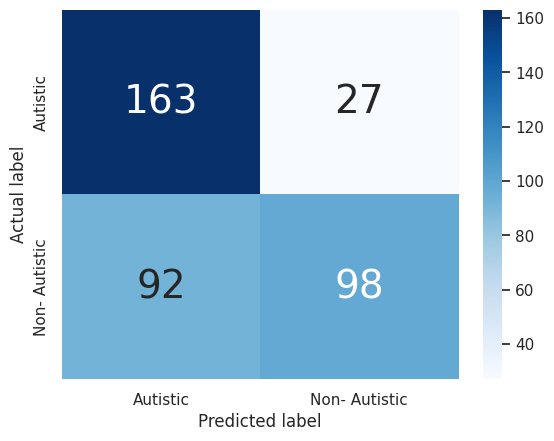

In [48]:
from __future__ import print_function
import sklearn
from matplotlib import pyplot as plt 
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import numpy as np
import h5py
import os
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn
import sklearn.metrics as metrics
from keras.models import load_model

#Change HERE  
##model = load_model('../Kaggle/working/vgg19.h5')
print(test_generator.samples)
predictions = model.predict_generator(test_generator, steps = np.ceil(test_generator.samples / test_generator.batch_size), verbose=1, workers=1) 
Y_pred = np.argmax(predictions, axis=1) 
print('Classification Report') 
print(classification_report(test_generator.classes, Y_pred))
%matplotlib inline
original = test_generator.labels

cm=confusion_matrix(original,Y_pred)
print(cm)
y_true = ["Non- Autistic","Autistic"]
#y_true=['Non- Autistic', 'Autistic']
data = cm
class1_acc = data[0][0]/(data[0][0]+data[0][1])
class2_acc = data[1][1]/(data[1][0]+data[1][1])
print('class-1 acc: ',class1_acc)
print('class-2 acc: ',class2_acc)

df_cm = pd.DataFrame(data, columns=np.unique(y_true), index = np.unique(y_true))
df_cm.index.name = 'Actual label'
df_cm.columns.name = 'Predicted label'
sn.set(font_scale=1)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 28}, fmt="d")
plt.savefig('Cm.pdf', format='pdf', dpi=300)
plt.savefig('Cm.png', format='png', dpi=300)
fpr_Xce, tpr_Xce, threshold = metrics.roc_curve(original, Y_pred)
#roc_auc = metrics.auc(fpr, tpr)

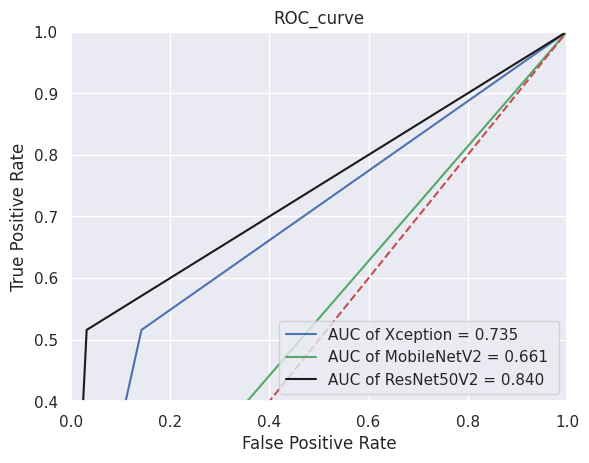

In [49]:
# auc_Xce =0.9625
# auc_Vgg=0.9214
# auc_Mob=0.923
# auc_Res=0.9571
# auc_Eff=0.899

plt.title('ROC_curve')
plt.plot(fpr_Xce, tpr_Xce, 'b', label = 'AUC of Xception = %0.3f ' % auc_Xce)
plt.plot(fpr_Mob, tpr_Mob, 'g', label = 'AUC of MobileNetV2 = %0.3f ' % auc_Mob)
plt.plot(fpr_Res, tpr_Res, 'k', label = 'AUC of ResNet50V2 = %0.3f ' % auc_Res)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0.4, 1.0])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig('ROC.pdf', format='pdf', dpi=300)
plt.savefig('ROC.png', format='png', dpi=300)
plt.show()

(380, 2)

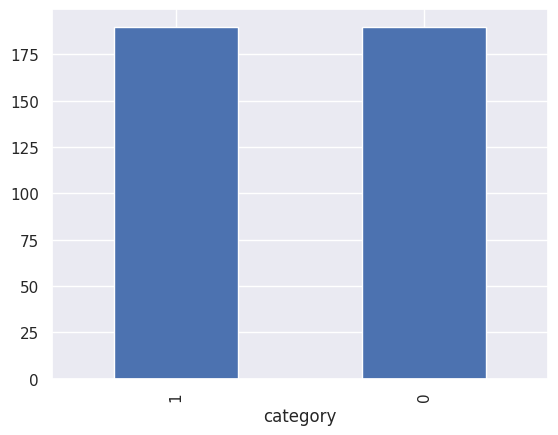

In [61]:
#Lebel the test dataset

validation_filenames = os.listdir("/kaggle/input/fedaratedd1-d2/Fedarated/Test")
categories = []
New_file= []
for filename in validation_filenames:
    category = filename.split(' (')[0]
    if category == 'Autistic':
        categories.append(str(1))
        New_file.append(filename)
    if category == 'Non-Autistic':
        categories.append(str(0))
        New_file.append(filename)

validation_df1 = pd.DataFrame({
    'filename': New_file,
    'category': categories
})

categories = []
New_file= []
for filename in validation_filenames:
    category = filename.split('_')[0]
    #print(filename.split('_')[0])
    if category == 'DestAutistic':
        categories.append(str(1))
        New_file.append(filename)
    if category == 'DestNon':
        categories.append(str(0))
        New_file.append(filename)

validation_df2 = pd.DataFrame({
    'filename': New_file,
    'category': categories
})

validation_df = pd.concat([validation_df1, validation_df2], ignore_index = True)
validation_df.reset_index()

validation_df

validation_df['category'].value_counts().plot.bar()
validation_df.shape

In [62]:

# test Generator
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_dataframe(validation_df, "/kaggle/input/fedaratedd1-d2/Fedarated/Test", 
    x_col='filename',
    y_col='category',
    class_mode='categorical',target_size=(image_size, image_size),batch_size=batch_size,shuffle=False)

Found 380 validated image filenames belonging to 2 classes.


In [59]:
#Lebel the test dataset
from keras.preprocessing.image import ImageDataGenerator

epochs = 50
batch_size = 32
LEARNING_R = .001


image_size = 224
input_shape = (image_size, image_size, 3)


test_filenames = os.listdir("/kaggle/input/test140/test")
categories = []
for filename in test_filenames:
    category = filename.split(' (')[0]
    if category == 'Autistic':
        categories.append(str(1))
    else:
        categories.append(str(0))

test_df = pd.DataFrame({
    'filename': test_filenames,
    'category': categories
})
test_df

# test Generator
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_dataframe(test_df, "/kaggle/input/test140/test", 
    x_col='filename',
    y_col='category',
    class_mode='categorical',target_size=(image_size, image_size),batch_size=batch_size,shuffle=False)

Found 280 validated image filenames belonging to 2 classes.


In [69]:
from __future__ import print_function
import sklearn
from matplotlib import pyplot as plt 
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import numpy as np
import h5py
import os
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn
import sklearn.metrics as metrics
from keras.models import load_model

#Change HERE  
model = load_model('/kaggle/input/active-l-best-model/Res_Active_T1_T2 (1).h5')


loss,accuracy,auc_Xce,precision,recall = model.evaluate_generator(test_generator, np.ceil(test_generator.samples / test_generator.batch_size), workers=1)
print("Xception: Test: Accuracy = %f  ;  AUC = %f ;  Precision = %f  ;  Recall = %f ;  Loss = %f  " % (accuracy, auc_Xce, precision, recall, loss))



/tmp/ipykernel_42/274016653.py:21: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  loss,accuracy,auc_Xce,precision,recall = model.evaluate_generator(test_generator, np.ceil(test_generator.samples / test_generator.batch_size), workers=1)


Xception: Test: Accuracy = 0.694737  ;  AUC = 0.767452 ;  Precision = 0.694737  ;  Recall = 0.694737 ;  Loss = 1.692720  


In [54]:
# from __future__ import print_function
# import sklearn
# from matplotlib import pyplot as plt 
# from sklearn.metrics import classification_report
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import confusion_matrix
# import numpy as np
# import h5py
# import os
# import matplotlib.pyplot as plt
# from sklearn.metrics import confusion_matrix
# import pandas as pd
# import seaborn as sn
# import sklearn.metrics as metrics
# from keras.models import load_model

# #Change HERE  
# model = load_model('/kaggle/input/federated-model/Res_Final.h5')
# print(test_generator.samples)
# predictions = model.predict_generator(test_generator, steps = np.ceil(test_generator.samples / test_generator.batch_size), verbose=1, workers=1) 
# Y_pred = np.argmax(predictions, axis=1) 
# print('Classification Report') 
# print(classification_report(test_generator.classes, Y_pred))
# %matplotlib inline
# original = test_generator.labels

# cm=confusion_matrix(original,Y_pred)
# print(cm)
# y_true = ["Non- Autistic","Autistic"]
# #y_true=['Non- Autistic', 'Autistic']
# data = cm
# class1_acc = data[0][0]/(data[0][0]+data[0][1])
# class2_acc = data[1][1]/(data[1][0]+data[1][1])
# print('class-1 acc: ',class1_acc)
# print('class-2 acc: ',class2_acc)

# df_cm = pd.DataFrame(data, columns=np.unique(y_true), index = np.unique(y_true))
# df_cm.index.name = 'Actual label'
# df_cm.columns.name = 'Predicted label'
# sn.set(font_scale=1)#for label size
# sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 28}, fmt="d")
# plt.savefig('Cm.pdf', format='pdf', dpi=300)
# plt.savefig('Cm.png', format='png', dpi=300)
# fpr_Mob, tpr_Mob, threshold = metrics.roc_curve(original, Y_pred)
# #roc_auc = metrics.auc(fpr, tpr)